Estatística descritiva é entendida como um conjunto de técnicas para facilitar a exploração, análise e sumarização de dados, bem como sua eficiente comunicação ao público interessado. 

Dentre as muitas técnicas utilizadas pela estatística descritiva estão as tabelas de frequência e os gráficos do tipo pizza e barras. Neste artigo, exploramos estas ferramentas, indicando as situações de uso mais comum, e as situações possivelmente inadequadas.

Para a construção de exemplos, utilizamos a linguagem Python com as bibliotecas Numpy, Pandas e Matplotlib, e um banco de dados dos passageiros do navio Titanic, afundado no Atlântico Norte, em 1914.

O objetivo desse artigo não é discutir a tecnologia envolvida na construção dos exemplos, e sim o conceito estatístico. Entretanto, divulgaremos os códigos dos exemplos, especialmente para os leitores interessados em estuda-los e adapta-los para a sua realidade. 

## Instalação dos pacotes **rdatasets**, que contém diversos bancos de dados para estudos, **numpy**, para matemática matricial, **pandas**, para facilitar operações com *dataframes*, e **matplotlib**, para criação de gráficos.

In [2]:
from rdatasets import data

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

### Carga do banco de dados específico sobre os passageiros do Titanic

In [6]:
titanic = data("carData","TitanicSurvival")

In [9]:
titanic

,survived,sex,age,passengerClass
0,yes,female,29.0000,1st
1,yes,male,0.9167,1st
2,no,female,2.0000,1st
3,no,male,30.0000,1st
4,no,female,25.0000,1st
...,...,...,...,...
1304,no,female,14.5000,3rd
1305,no,female,NaN,3rd
1306,no,male,26.5000,3rd
1307,no,male,27.0000,3rd


In [10]:
titanic.info()

TypeError: getsizeof(...)
    getsizeof(object, default) -> int

    Return the size of object in bytes.

sys.getsizeof(object, default) will always return default on PyPy, and
raise a TypeError if default is not provided.

First note that the CPython documentation says that this function may
raise a TypeError, so if you are seeing it, it means that the program
you are using is not correctly handling this case.

On PyPy, though, it always raises TypeError.  Before looking for
alternatives, please take a moment to read the following explanation as
to why it is the case.  What you are looking for may not be possible.

A memory profiler using this function is most likely to give results
inconsistent with reality on PyPy.  It would be possible to have
sys.getsizeof() return a number (with enough work), but that may or
may not represent how much memory the object uses.  It doesn't even
make really sense to ask how much *one* object uses, in isolation
with the rest of the system.  For example, instances have maps,
which are often shared across many instances; in this case the maps
would probably be ignored by an implementation of sys.getsizeof(),
but their overhead is important in some cases if they are many
instances with unique maps.  Conversely, equal strings may share
their internal string data even if they are different objects---or
empty containers may share parts of their internals as long as they
are empty.  Even stranger, some lists create objects as you read
them; if you try to estimate the size in memory of range(10**6) as
the sum of all items' size, that operation will by itself create one
million integer objects that never existed in the first place.


## Tabelas de Frequência por Classes

**Tabelas de frequência são tabelas que expõem contagens de quantas vezes um determinado evento aconteceu. Normalmente cria-se tabelas de frequência classificando-se e contando-se as ocorrências por tipo ou tipos.**

**O código seguinte calcula uma tabela de frequência que mostra quantos passageiros sobreviveram ao naufrágio e quantos não sobreviveram.**

In [11]:
pd.crosstab(index=titanic["survived"], columns="count", margins=True).drop(columns=["All"])

col_0,count
survived,
no,809
yes,500
All,1309


**O código seguinte calcula uma tabela de frequência bidimensional, contando quantos passageiros sobreviveram e não sobreviveram, por classe de passageiro.**

In [12]:
titanic_class = pd.crosstab(index=titanic["survived"],columns=titanic["passengerClass"], margins=True) 

In [13]:
titanic_class

passengerClass,1st,2nd,3rd,All
survived,,,,
no,123,158,528,809
yes,200,119,181,500
All,323,277,709,1309


**Uma variação na tabela de frequência seria mostrar, ao invés da contagem, o percentual. No exemplo abaixo, mostramos o percentual de sobrevivência ou não, por classe de viagem.**

In [14]:
titanic_class/titanic_class.loc["All"]

passengerClass,1st,2nd,3rd,All
survived,,,,
no,0.380805,0.570397,0.744711,0.618029
yes,0.619195,0.429603,0.255289,0.381971
All,1.000000,1.000000,1.000000,1.000000


**Alternativamente, pode-se calcular o percentual de classe de viage, dentro dos que sobreviveram ou não, como no exemplo abaixo.**

In [15]:
titanic_class.div(titanic_class["All"], axis=0)

passengerClass,1st,2nd,3rd,All
survived,,,,
no,0.152040,0.195303,0.652658,1.0
yes,0.400000,0.238000,0.362000,1.0
All,0.246753,0.211612,0.541635,1.0


**A seguir, calculamos uma tabela de frequência que conta os sobreviventes ou não, por sexo do passageiro.**

In [16]:
titanic_sex = pd.crosstab(index=titanic["survived"],columns=titanic["sex"], margins=True) 

In [17]:
titanic_sex

sex,female,male,All
survived,,,
no,127,682,809
yes,339,161,500
All,466,843,1309


**Alternativamente podemos calcular o percentual de sobreviventes ou não, por sexo do passageiro.**

In [18]:
titanic_sex/titanic_sex.loc["All"]

sex,female,male,All
survived,,,
no,0.272532,0.809015,0.618029
yes,0.727468,0.190985,0.381971
All,1.000000,1.000000,1.000000


**Pode-se também calcular o percentual para cada sexo, dentre os sobreviventes ou não sobreviventes.**

In [19]:
titanic_sex.div(titanic_class["All"], axis=0)

sex,female,male,All
survived,,,
no,0.156984,0.843016,1.0
yes,0.678000,0.322000,1.0
All,0.355997,0.644003,1.0


**O exemplo abaixo calcula uma tabela de frequência tridimensional. Observar que a contagem de sobreviventes ou não sobreviventes, é feita, agrupando ainda por classe de passageiro e sexo.**


In [20]:
titanic_class_sex = pd.crosstab(index=titanic["survived"],\
columns=[titanic["passengerClass"],titanic["sex"]], margins=True) 

In [21]:
titanic_class_sex

passengerClass    1st         2nd         3rd        All
sex            female male female male female male      
survived                                                
no                  5  118     12  146    110  418   809
yes               139   61     94   25    106   75   500
All               144  179    106  171    216  493  1309

**Da mesma forma, o exemplo seguinte calcula o percentual de sobreviventes ou não sobreviventes, agrupando por classe de passageiro e sexo.**

In [22]:
titanic_class_sex/titanic_class_sex.loc["All"]

passengerClass       1st                 2nd                 3rd           \
sex               female      male    female      male    female     male   
survived                                                                    
no              0.034722  0.659218  0.113208  0.853801  0.509259  0.84787   
yes             0.965278  0.340782  0.886792  0.146199  0.490741  0.15213   
All             1.000000  1.000000  1.000000  1.000000  1.000000  1.00000   

passengerClass       All  
sex                       
survived                  
no              0.618029  
yes             0.381971  
All             1.000000

**Alternativamente, o exemplo seguinte calcula o percentual de sexo e classe de passageito, entre os sobreviventes ou não sobreviventes.**

In [23]:
titanic_class_sex.div(titanic_class_sex["All"], axis=0)

passengerClass       1st                 2nd                 3rd            \
sex               female      male    female      male    female      male   
survived                                                                     
no              0.006180  0.145859  0.014833  0.180470  0.135970  0.516687   
yes             0.278000  0.122000  0.188000  0.050000  0.212000  0.150000   
All             0.110008  0.136746  0.080978  0.130634  0.165011  0.376623   

passengerClass  All  
sex                  
survived             
no              1.0  
yes             1.0  
All             1.0

**Um outro tipo de tabela de frequência conta as ocorrências não por classes, mas por faixa. O exemplo abaixo calcula uma tabela de frequência dos passageiros do Titanic, dividindo-se em 9 faixas etárias.**

In [24]:
s = titanic['age'].dropna().to_numpy()
out, bins = pd.cut(s, bins=9, include_lowest=True, right=False, retbins=True)
out.value_counts()

[0.167, 9.037)       82
[9.037, 17.907)      72
[17.907, 26.778)    320
[26.778, 35.648)    250
[35.648, 44.519)    146
[44.519, 53.389)     99
[53.389, 62.259)     55
[62.259, 71.13)      19
[71.13, 80.08)        3
dtype: int64

## Gráficos de Pizza

**Gráficos de pizza são representações gráficas onde valores são apresentados, codificados em forma de regiões radiais, num formato que lembra fatias de uma pizza.**

(-1.1113280654799638,
 1.100539471215311,
 -1.1212090063519629,
 1.1136155340326674)

/home/jose/miniconda3/envs/statistics/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


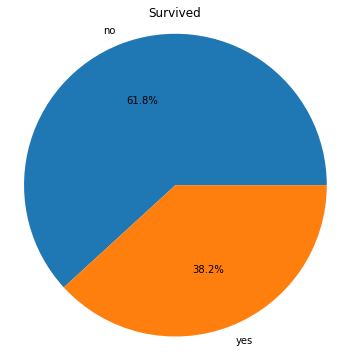

In [25]:
plot = pd.crosstab(index=titanic["survived"], columns="count")\
    .plot.pie(autopct='%1.1f%%', y="count", figsize=[6,6], title="Survived", legend=False)
plot.set_ylabel("")
plot.axis('equal')

/home/jose/miniconda3/envs/statistics/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


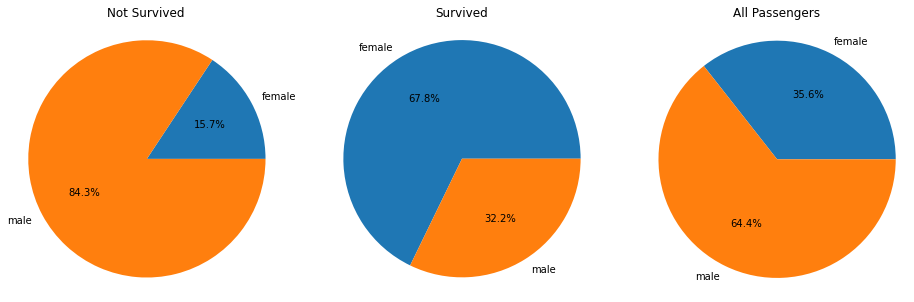

In [26]:
plots = titanic_sex.div(titanic_sex["All"], axis=0).transpose()[0:2].plot.pie(figsize=[16,5], \
subplots=True, legend=False,  autopct='%1.1f%%', title=["Not Survived","Survived","All Passengers"])
for plot in plots:
    plot.set_ylabel('')
    plot.axis('equal')

/home/jose/miniconda3/envs/statistics/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


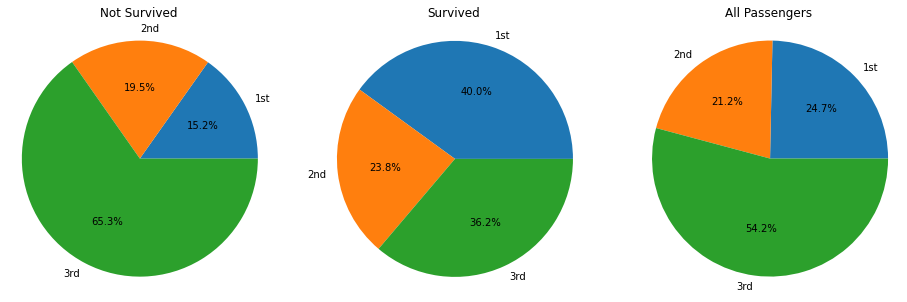

In [27]:
plots = titanic_class.div(titanic_class["All"], axis=0).transpose()[0:3].\
plot.pie(title=["Not Survived","Survived","All Passengers"],figsize=[16,5],\
subplots=True, legend=False,  autopct='%1.1f%%')
for plot in plots:
    plot.set_ylabel('')
    plot.axis('equal')

(-1.1074065303894531,
 1.1003526919233073,
 -1.1089434829190796,
 1.1091572404708565)

/home/jose/miniconda3/envs/statistics/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


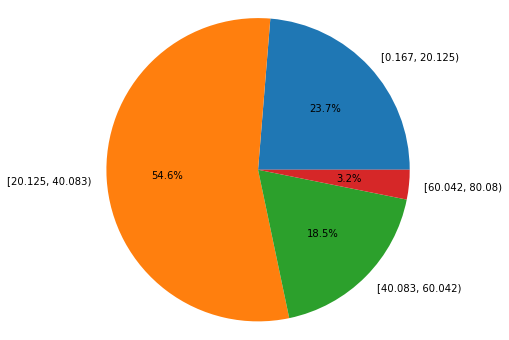

In [28]:
s = titanic['age'].dropna().to_numpy()
out, bins = pd.cut(s, bins=4, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.pie(figsize=[6,6], legend=False, autopct='%1.1f%%')
plt.ylabel("")
plt.axis('equal')

/home/jose/miniconda3/envs/statistics/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


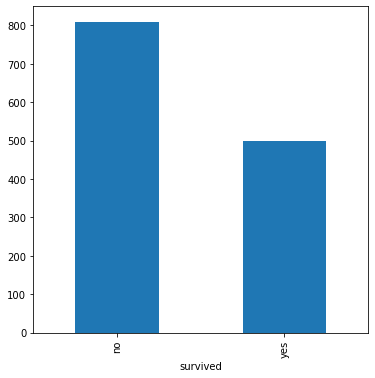

In [29]:
plot = pd.crosstab(index=titanic["survived"], columns="count")\
    .plot.bar(y="count", figsize=[6,6], legend=False)

/home/jose/miniconda3/envs/statistics/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


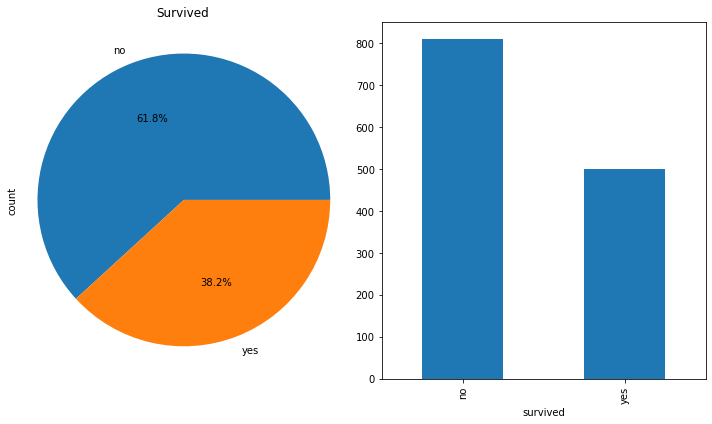

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
plot = pd.crosstab(index=titanic["survived"], columns="count")\
    .plot.pie(ax=axes[0], autopct='%1.1f%%', y="count", title="Survived", legend=False)
plot.axis('equal')
pd.crosstab(index=titanic["survived"], columns="count")\
    .plot.bar(ax=axes[1], y="count", legend=False)
fig.tight_layout()

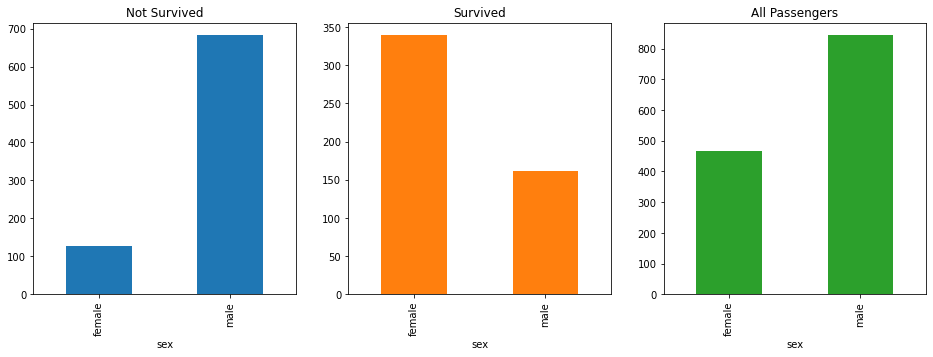

In [31]:
plots = titanic_sex.transpose()[0:2].plot.bar(figsize=[16,5], \
subplots=True, legend=False, title=["Not Survived","Survived","All Passengers"], layout=(1,3))

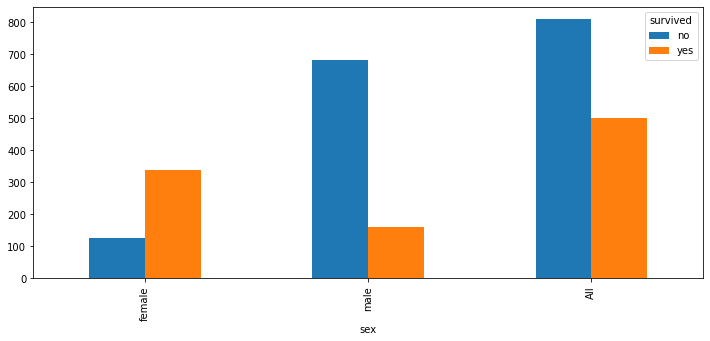

In [32]:
plots = titanic_sex[0:2].transpose()[0:3].plot.bar(figsize=[12,5])

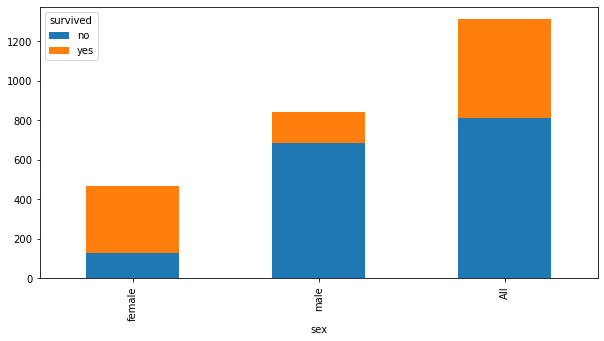

In [33]:
plots = titanic_sex[0:2].transpose()[0:3].plot.bar(figsize=[10,5], stacked=True)

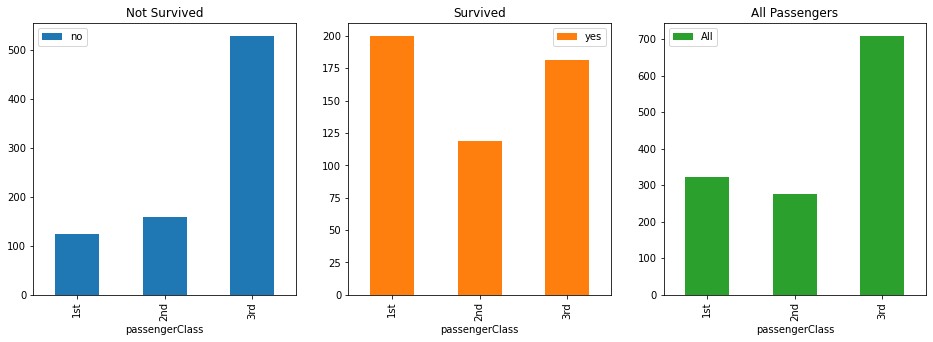

In [34]:
plots = titanic_class.transpose()[0:3].\
plot.bar(title=["Not Survived","Survived","All Passengers"],figsize=[16,5],\
subplots=True, layout=(1,3))

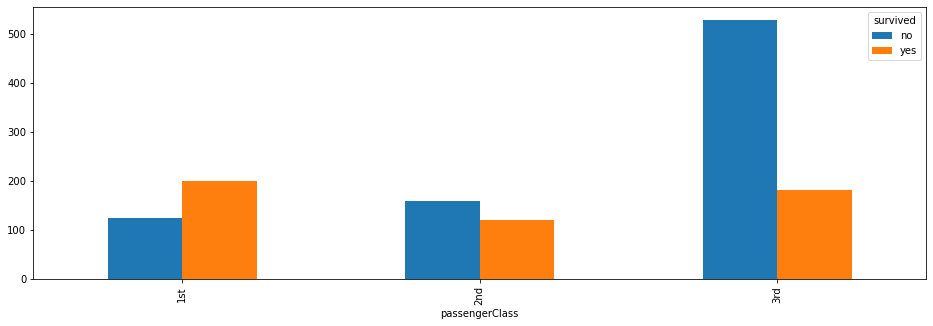

In [35]:
plots = titanic_class[0:2].transpose()[0:3].\
plot.bar(figsize=[16,5])

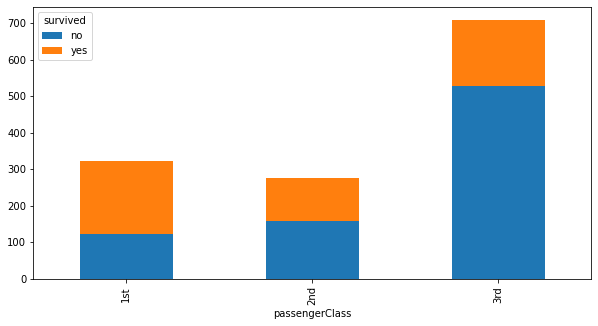

In [36]:
plots = titanic_class[0:2].transpose()[0:3].plot.bar(figsize=[10,5], stacked=True)

<AxesSubplot:>

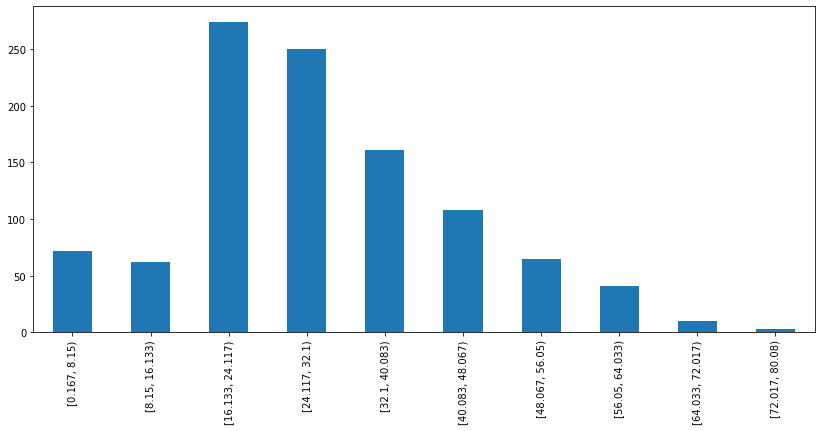

In [37]:
s = titanic['age'].dropna().to_numpy()
out, bins = pd.cut(s, bins=10, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar(figsize=[14,6])

(-1.1074065303894531,
 1.1003526919233073,
 -1.1089434829190796,
 1.1091572404708565)

/home/jose/miniconda3/envs/statistics/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


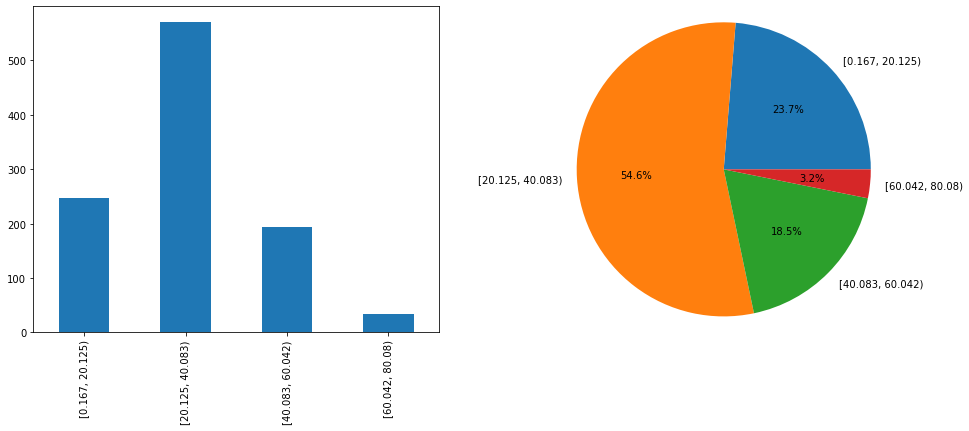

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
n_bins=4
s = titanic['age'].dropna().to_numpy()
out, bins = pd.cut(s, bins=n_bins, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar(ax=axes[0])

s = titanic['age'].dropna().to_numpy()
out, bins = pd.cut(s, bins=n_bins, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.pie(ax=axes[1], legend=False, autopct='%1.1f%%')
plt.ylabel("")
plt.axis('equal')